In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inventorize as inv

In [2]:
# Import and process data
retail = pd.read_csv('online_retail2.csv').drop_duplicates(ignore_index=True).dropna(axis=0, how='any')
retail = retail[retail['Quantity'] >= 0]
retail['Revenue'] = retail['Price'] * retail['Quantity']
grouped_df = retail.groupby(by = 'Description').agg(Quantity = ('Quantity', 'sum'), Revenue = ('Revenue', 'sum')).reset_index()
grouped_df.head()


,Description,Quantity,Revenue
0,DOORMAT UNION JACK GUNS AND ROSES,167,1071.25
1,3 STRIPEY MICE FELTCRAFT,662,1241.10
2,4 PURPLE FLOCK DINNER CANDLES,324,495.16
3,50'S CHRISTMAS GIFT BAG LARGE,1885,2272.25
4,ANIMAL STICKERS,385,80.85


## 1. ABC classification

In [3]:
# Classify product by total quantity
abc = inv.ABC(grouped_df[['Description', 'Quantity']])
abc

,Description,Quantity,Percentage,comulative,Category
5168,WORLD WAR 2 GLIDERS ASSTD DESIGNS,105185,9.990307e-03,0.009990,A
5047,WHITE HANGING HEART T-LIGHT HOLDER,91757,8.714937e-03,0.018705,A
3129,"PAPER CRAFT , LITTLE BIRDIE",80995,7.692779e-03,0.026398,A
292,ASSORTED COLOUR BIRD ORNAMENT,78234,7.430543e-03,0.033829,A
2695,MEDIUM CERAMIC TOP STORAGE JAR,77916,7.400340e-03,0.041229,A
...,...,...,...,...,...
3451,PINK STRIPES SHOULDER BAG,1,9.497844e-08,1.000000,C
213,AMBER CRYSTAL DROP EARRINGS,1,9.497844e-08,1.000000,C
4571,SPOTTY COCKEREL DOORSTOP,1,9.497844e-08,1.000000,C
145,6 HOOK JEWEL STAND LILAC DRESS,1,9.497844e-08,1.000000,C


In [4]:
# Count of each category
abc['Category'].value_counts().sort_values()

Category
A    1157
B    1245
C    2881
Name: count, dtype: int64

Text(0.5, 1.0, 'Sum quantity per category')

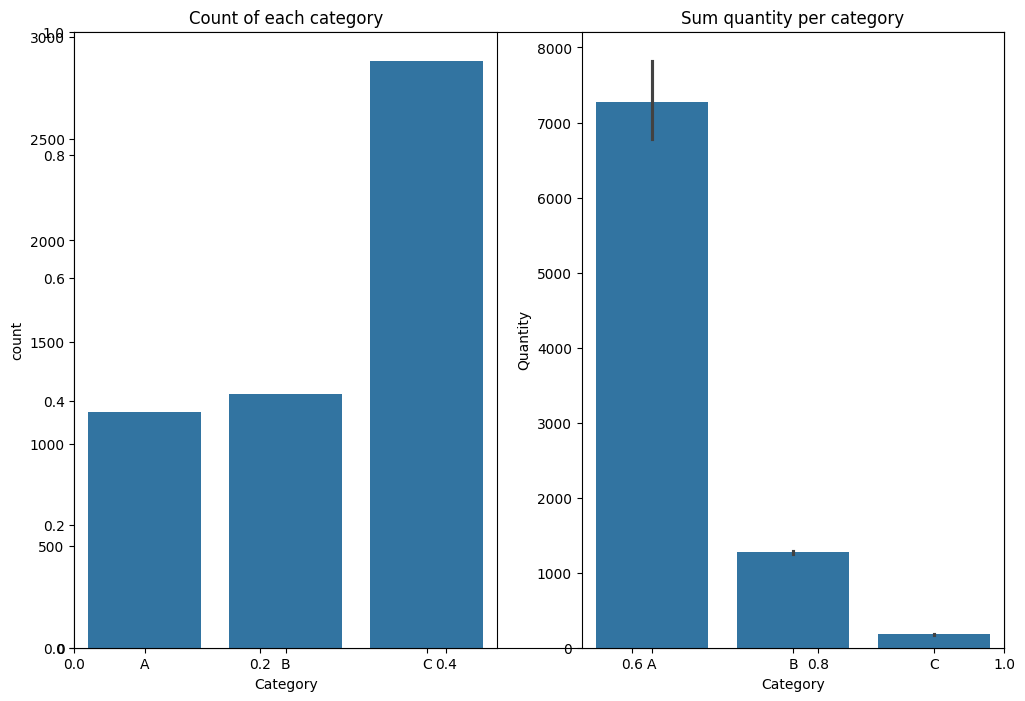

In [5]:
plt.subplots(figsize=(12, 8))

# Plot the count of sku per category
plt.subplot(1, 2, 1)
sns.countplot(data=abc, x=abc['Category'])
plt.title('Count of each category')

# Plot the sum quantity per category
plt.subplot(1, 2, 2)
sns.barplot(data=abc, x=abc['Category'], y=abc['Quantity'])
plt.title('Sum quantity per category')

## 2. ABC-XYZ classification

In [6]:
# Classify each product by total quantity and revenue
product_mix = inv.productmix(grouped_df['Description'], grouped_df['Quantity'], grouped_df['Revenue'])
product_mix.head()

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
3769,REGENCY CAKESTAND 3 TIER,24139,277656.25,0.002293,0.177816,0.015980,0.015980,A,A,A_A
5047,WHITE HANGING HEART T-LIGHT HOLDER,91757,247048.01,0.008715,0.018705,0.014219,0.030199,A,A,A_A
3129,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60,0.007693,0.026398,0.009696,0.039895,A,A,A_A
2860,Manual,9391,151777.67,0.000892,0.424068,0.008736,0.048631,A,A,A_A
2392,JUMBO BAG RED RETROSPOT,74224,134307.44,0.007050,0.048279,0.007730,0.056361,A,A,A_A


In [7]:
# Count of each category
product_mix['product_mix'].value_counts().sort_values(ascending=False)

product_mix
C_C    2394
A_A     775
B_B     632
C_B     413
B_C     325
A_B     317
B_A     288
C_A      74
A_C      65
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of sku per category')

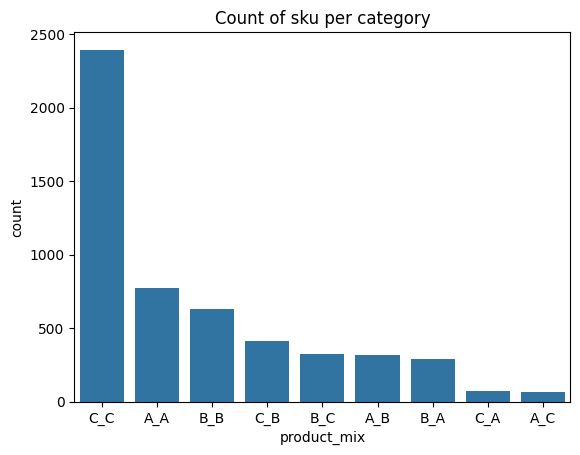

In [8]:
# Plot the count of sku per category
sns.countplot(data=product_mix, 
              x=product_mix['product_mix'],
              order=product_mix['product_mix'].value_counts().index)
plt.title('Count of sku per category')

Text(0.5, 1.0, 'Sum revenue per category')

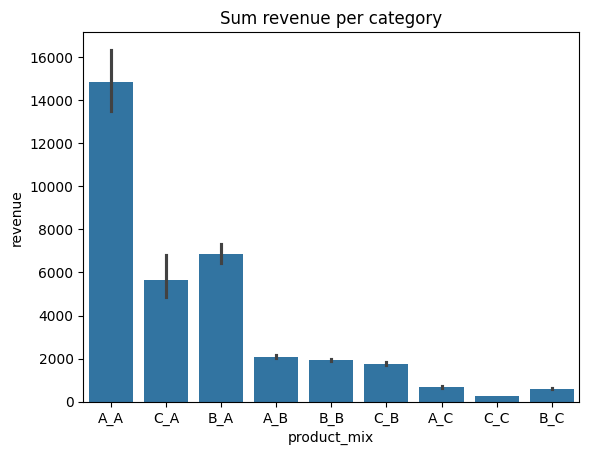

In [9]:
# Plot the sum of revenue per category
sns.barplot(data=product_mix, 
            x=product_mix['product_mix'], 
            y=product_mix['revenue'])
plt.title('Sum revenue per category')

## 3. ABC-XYZ classification for each country

In [10]:
# Group by Country and Description
retail_by_country = retail.groupby(by = ['Country', 'Description']).agg(total_sales = ('Quantity','sum'), total_revenue = ('Revenue','sum')).reset_index()
retail_by_country

,Country,Description,total_sales,total_revenue
0,Australia,DOLLY GIRL BEAKER,200,216.00
1,Australia,I LOVE LONDON MINI BACKPACK,4,16.60
2,Australia,10 COLOUR SPACEBOY PEN,48,40.80
3,Australia,12 PENCIL SMALL TUBE WOODLAND,384,211.20
4,Australia,12 PENCILS SMALL TUBE RED SPOTTY,24,15.60
...,...,...,...,...
29444,West Indies,VINTAGE BEAD PINK SCARF,3,23.85
29445,West Indies,WHITE AND BLUE CERAMIC OIL BURNER,6,7.50
29446,West Indies,WOODLAND PARTY BAG + STICKER SET,1,1.65
29447,West Indies,WOVEN BERRIES CUSHION COVER,2,9.90


In [11]:
# ABC-XYZ classification for each country
mix_country = inv.productmix_storelevel(SKUs=retail_by_country['Description'], 
                                        sales=retail_by_country['total_sales'], 
                                        revenue=retail_by_country['total_revenue'], 
                                        storeofsku=retail_by_country['Country'])
mix_country

,sku,sales,revenue,storeofsku,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
527,RABBIT NIGHT LIGHT,1884,3375.84,Australia,0.018104,0.047508,0.019942,0.019942,A,A,A_A
573,REGENCY CAKESTAND 3 TIER,266,2930.70,Australia,0.002556,0.504521,0.017312,0.037254,A,A,A_A
570,RED TOADSTOOL LED NIGHT LIGHT,1668,2464.20,Australia,0.016028,0.080141,0.014557,0.051811,A,A,A_A
180,DOLLY GIRL LUNCH BOX,1316,2182.20,Australia,0.012646,0.105932,0.012891,0.064702,A,A,A_A
671,SET OF 6 SPICE TINS PANTRY DESIGN,600,2082.00,Australia,0.005766,0.222097,0.012299,0.077001,A,A,A_A
...,...,...,...,...,...,...,...,...,...,...,...
29400,3 BLACK CATS W HEARTS BLANK CARD,13,2.47,West Indies,0.032911,0.458228,0.004605,0.991219,A,C,A_C
29446,WOODLAND PARTY BAG + STICKER SET,1,1.65,West Indies,0.002532,1.000000,0.003076,0.994295,C,C,C_C
29439,SKULLS PARTY BAG + STICKER SET,1,1.65,West Indies,0.002532,0.994937,0.003076,0.997371,C,C,C_C
29417,HAPPY BIRTHDAY CARD TEDDY/CAKE,4,0.76,West Indies,0.010127,0.893671,0.001417,0.998788,B,C,B_C


In [12]:
# Group by country and category to check SKU count
mix_country = mix_country.groupby(by = ['storeofsku', 'product_mix']).agg('count').reset_index()
mix_country[['storeofsku', 'product_mix', 'sku']]

,storeofsku,product_mix,sku
0,Australia,A_A,178
1,Australia,A_B,77
2,Australia,A_C,7
3,Australia,B_A,74
4,Australia,B_B,106
...,...,...,...
346,West Indies,B_B,4
347,West Indies,B_C,4
348,West Indies,C_A,6
349,West Indies,C_B,3


In [13]:
# Check Australia
australia = mix_country[mix_country['storeofsku'] == 'Australia'][['storeofsku', 'product_mix', 'sku']]
australia

,storeofsku,product_mix,sku
0,Australia,A_A,178
1,Australia,A_B,77
2,Australia,A_C,7
3,Australia,B_A,74
4,Australia,B_B,106
5,Australia,B_C,26
6,Australia,C_A,8
7,Australia,C_B,59
8,Australia,C_C,298


Text(0.5, 1.0, 'Australia count of sku per category')

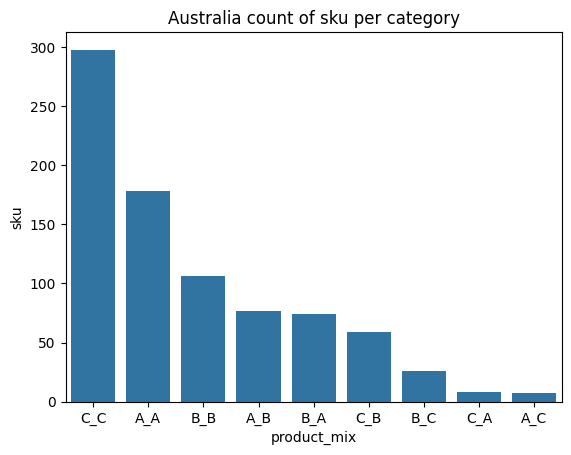

In [14]:
# Plot the data for Australia
sns.barplot(data=australia.sort_values(by=['sku'], ascending=False), x='product_mix', y='sku')
plt.title('Australia count of sku per category')

## 4. Kraljic matrix

In [15]:
# Import data
supplier = pd.read_csv('supplier_data.csv').drop_duplicates(ignore_index=True).dropna(axis=0, how='any')
supplier['risk_index'] = supplier['availability'] + supplier['no_suppliers'] + supplier['standard'] + supplier['price_fluctuation']
supplier['value'] = supplier['Quantity'] * supplier['price']
supplier.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price,risk_index,value
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360,1.0,255600
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740,1.0,8211780
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919,1.0,11433723
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246,1.0,12422442
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596,0.5,13959672


In [16]:
# Define a function to classify the product into Kraljic matrix 
def category(value, risk_index):
    if (value >= 3000000) & (risk_index >= 1):
        return 'strategic'
    if (value >= 3000000) & (risk_index < 1):
        return 'leverage'
    if (value < 3000000) & (risk_index >= 1):
        return 'routine'
    if (value < 3000000) & (risk_index < 1):
        return 'critical'

# Create category column
supplier['category'] = np.nan

# Apply the function
for i in range(len(supplier)):
    supplier['category'][i] = category(supplier['value'][i], supplier['risk_index'][i])

supplier.head()

C:\Users\thanh\AppData\Local\Temp\ipykernel_9432\748086566.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  supplier['category'][i] = category(supplier['value'][i], supplier['risk_index'][i])
C:\Users\thanh\AppData\Local\Temp\ipykernel_9

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price,risk_index,value,category
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360,1.0,255600,routine
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740,1.0,8211780,strategic
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919,1.0,11433723,strategic
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246,1.0,12422442,strategic
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596,0.5,13959672,leverage


In [17]:
# Count of sku per category
supplier.category.value_counts()

category
routine      10
strategic     8
leverage      4
critical      2
Name: count, dtype: int64

Text(0.5, 1.0, 'Kraljic matrix')

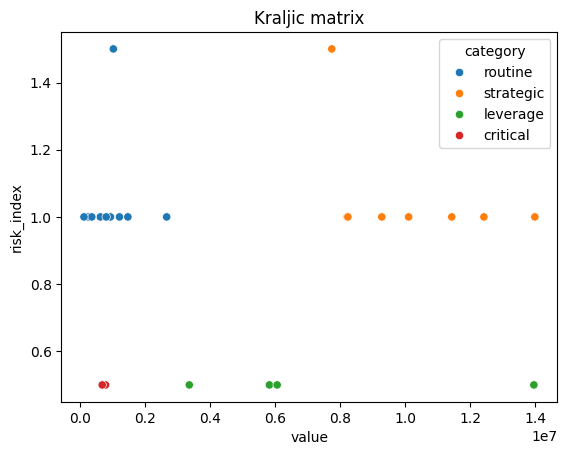

In [18]:
# Kraljic matrix
sns.scatterplot(data = supplier, x = 'value', y = 'risk_index', hue = 'category')
plt.title('Kraljic matrix')